In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import os

In [2]:
DATA_DIR = r"../data/processed/BP_npy/0625_256_2_diff_clean/p00"

In [24]:
DATA_DIR = r"../data/processed/BP_npy/pulseDB/test_2.npy"

(38110, 2, 1250)
19426
[1230   18 1211]
[1.8 3.7 1.7]
(1250,) [ 0.   0.1  0.2 ... -0.3 -0.2 -0.1]


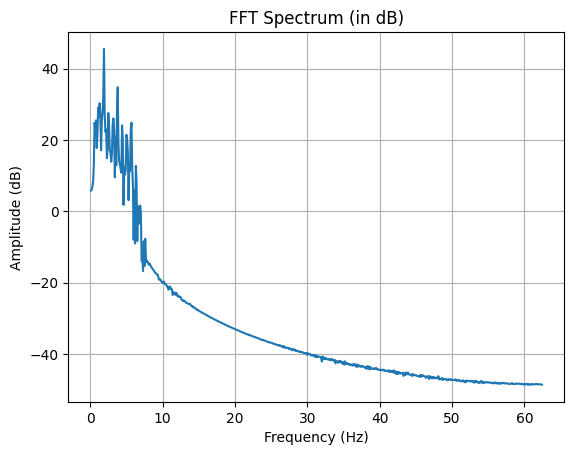

In [53]:
data = np.load(DATA_DIR)
print(data.shape)
i = np.random.randint(0, data.shape[0])
print(i)
data_fft = np.fft.fft(data[i,1])
amplitude = np.abs(data_fft)
amplitude_db = 20 * np.log10(amplitude + 1e-10) 
freqs = np.fft.fftfreq(len(data_fft), d=1.0/125)
print(np.argsort(-amplitude[1:])[:3])
print(freqs[np.argsort(-amplitude[1:len(freqs)//2])[:3]])
print(freqs.shape,freqs)
plt.plot(freqs[1:len(freqs)//2], amplitude_db[1:len(freqs)//2])
# plt.plot(freqs[1:len(freqs)//2-500], amplitude_db[1:len(freqs)//2-500])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (dB)')
plt.title('FFT Spectrum (in dB)')
plt.grid()
plt.show() 

In [3]:
data = np.load(os.path.join(DATA_DIR,"test.npy"))[:,:,:,0]
data.shape

(12643, 256, 2)

In [8]:
data_fft = np.abs(np.fft.fftn(data,axes=[2]))
data_fft.shape


(12643, 256, 2)

In [5]:
freq = np.fft.fftfreq(256,1/125)[:128]
freq.shape
freq

array([ 0.        ,  0.48828125,  0.9765625 ,  1.46484375,  1.953125  ,
        2.44140625,  2.9296875 ,  3.41796875,  3.90625   ,  4.39453125,
        4.8828125 ,  5.37109375,  5.859375  ,  6.34765625,  6.8359375 ,
        7.32421875,  7.8125    ,  8.30078125,  8.7890625 ,  9.27734375,
        9.765625  , 10.25390625, 10.7421875 , 11.23046875, 11.71875   ,
       12.20703125, 12.6953125 , 13.18359375, 13.671875  , 14.16015625,
       14.6484375 , 15.13671875, 15.625     , 16.11328125, 16.6015625 ,
       17.08984375, 17.578125  , 18.06640625, 18.5546875 , 19.04296875,
       19.53125   , 20.01953125, 20.5078125 , 20.99609375, 21.484375  ,
       21.97265625, 22.4609375 , 22.94921875, 23.4375    , 23.92578125,
       24.4140625 , 24.90234375, 25.390625  , 25.87890625, 26.3671875 ,
       26.85546875, 27.34375   , 27.83203125, 28.3203125 , 28.80859375,
       29.296875  , 29.78515625, 30.2734375 , 30.76171875, 31.25      ,
       31.73828125, 32.2265625 , 32.71484375, 33.203125  , 33.69

0.990502349241639

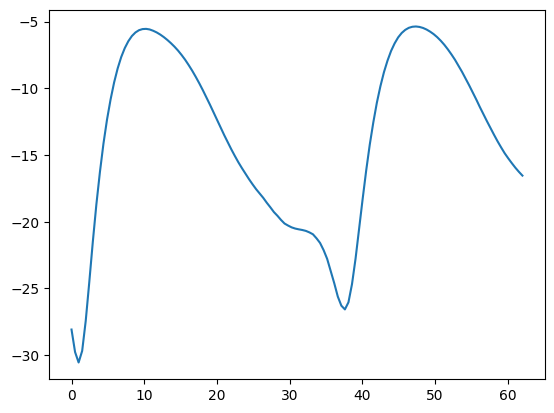

In [20]:
i = 0
j = np.random.randint(data_fft.shape[0])
# plt.plot(freq,data_fft[j,:,0][:128])
plt.plot(freq, 20 * np.log10(data_fft[j,:,1][:128]+1e-10))
np.corrcoef(data_fft[j,:,0][:128],data_fft[j,:,1][:128])[0][1]

In [86]:
corr = []
for j in range(data.shape[0]):
    corr.append(np.corrcoef(data_fft[j,:,0][:128],data_fft[j,:,1][:128])[0][1])
corr = np.array(corr)
corr.shape

(12643,)

In [77]:
np.save(os.path.join(DATA_DIR,"fft_corr_test.npy"),corr)

In [87]:
corr_flg = corr > 0.8 
corr_flg.shape

(12643,)

In [88]:
np.unique(corr_flg,return_counts=True)

(array([False,  True]), array([5273, 7370], dtype=int64))

In [81]:
np.save(os.path.join(DATA_DIR,"fft_corr_flg08_test.npy"),corr_flg)

In [ ]:
def spectrogram(x, nfft=50, fs=50):
    overlap = 25
    
    # x = np.round(x, 5)
    f, t, x = scipy.signal.spectrogram(x, fs=fs, nperseg=nfft, noverlap=overlap, axis=2)
    
    # 軸を指定して標準化（デフォルトの軸は周波数軸で標準化）
    std = np.std(x, axis=2, keepdims=True)
    std[std == 0] = 1e-5 # 0では割れないため、小さい数を足す
    
    x = (x - np.mean(x, axis=2, keepdims=True)) / std
    x[np.isnan(x)] = 0
    
    x = np.round(x, 5)
    return f, t, x

In [5]:
fs = 125
win = sg.windows.hann(128)  # 窓関数


AttributeError: module 'scipy.signal' has no attribute 'ShortTimeFFT'

In [ ]:
N_t = np.arange(Sxx.shape[1])
t = SFT.delta_t * N_t
f = SFT.f

# グラフ作成
fig = plt.figure(figsize=(12,6))
plt.pcolormesh(t, f, Sxx_dB, cmap="jet")
plt.colorbar(label="Power [dbFS]")
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

In [6]:
import scipy
scipy.__version__

'1.11.3'